 ### Function that calculates a sharpness "score" of each image:


In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
def sharpness(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lap = cv2.Laplacian(img, cv2.CV_16S)
    mean, stddev = cv2.meanStdDev(lap)
    return stddev[0,0]

In [ ]:
sharpness('/content/images.jpeg')

In [ ]:
image='/content/img.jpg'

In [ ]:
h_im = cv2.imread(...) # hostside data
d_im = cv2.UMat(im) # usable on "device"
d_lap = cv2.Laplacian(d_im, cv2.CV_32F) # single floats are usually faster than doubles
h_lap = d_lap.get() # retrieve data
# numpy functions unavailable on UMat, hence hostside calculation
var = h_lap.var()
# try cv.meanStdDev, calculates for each channel

In [ ]:
print(var)

2955.4668


In [1]:
help(cv2.findContours)

NameError: name 'cv2' is not defined

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os
import glob
from random import randint
import sys

minRadius = 10
maxRadius = 12
minArea = 3.14 * minRadius**2
maxArea = 3.14 * maxRadius**2


def isSmearDetected(src):
    # store all image list in the list
    data= glob.glob(src+"/*.jpeg")
    total_data_len = len(data)
    print(data)
    # find mean of all pixel values of all images
    meanByPixel = np.zeros((500,500,3),np.float)
    progressBar = 0
    lastProg = 0
    for img in data:
        curr_image = cv2.imread(img)
        # resize all images to the same size i.e. 500x500
        resize_curr_image = cv2.resize(curr_image,(500,500))
        resize_curr_image = cv2.medianBlur(resize_curr_image,5)
        i = np.array(resize_curr_image,dtype=np.float)
        meanByPixel += i

        # progress bar that updates at every 10%
        progress = ((progressBar) * 100) / total_data_len
        if progress >= lastProg:
            print ("Progress: "+str(progress) + "%")
            lastProg +=10
        progressBar += 1


    meanByPixel = meanByPixel /total_data_len
    # write mean image to the disk.
    cv2.imwrite("Mean_"+src.split('/')[1]+".jpg", meanByPixel)


    meanByPixel = np.array(np.round(meanByPixel),dtype=np.uint8)

    # convert mean image to grayscale means BGR -- > GRAY ( 3 pixel value to 1D pixel value )
    grayMeanImage = cv2.cvtColor(meanByPixel, cv2.COLOR_BGR2GRAY)

    # find ThresholdImage by using adaptiveThreshold method
    thresholdImage = cv2.adaptiveThreshold(grayMeanImage,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 105, 11)

    # find invert image which will act as mask
    mask = cv2.bitwise_not(thresholdImage)

    # save mask to the disk
    cv2.imwrite("Mask_"+src.split('/')[1]+".jpg",mask)


    # read random image from the directory to detect the smear
    read = data[0]
    readImage = cv2.imread(read)
    resizedRead = cv2.resize(readImage,(500,500))
    cv2_imshow(resizedRead)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    # find contours on mask image
    contours,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print(contours[0])
    print(cv2 .contourArea(contours[1]))
    if contours:
        # if contours is size of smear then locate it on our randomly piced image
        if(cv2.contourArea(contours[0])>minArea and cv2.contourArea(contours[0])<maxArea):
            # draw contours around smear on original image
            result = cv2.drawContours(resizedRead,contours,-1,(0,255,255),2)

            # save the image to the disk.
            cv2.imwrite("final_"+src.split('/')[1]+".jpg",resizedRead)
            cv2_imshow(result)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            return True


    return False


# if __name__ == "__main__":
#     args = sys.argv[1:]
#     if not args[0]:
#         print ("Directory is invalid")
#         sys.exit()

#     print("Directory Found. \n Smear Dectection in Progress...")
#     if(isSmearDetected(args[0])):
#         print ("Smear is detected for "+args[0]+" source.")
#     else:
#         print("No Smear in "+ args[0])

['/content/images (1).jpeg']
Progress: 0.0%


<ipython-input-32-3f79d27361b5>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meanByPixel = np.zeros((500,500,3),np.float)
<ipython-input-32-3f79d27361b5>:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.array(resize_curr_image,dtype=np.float)


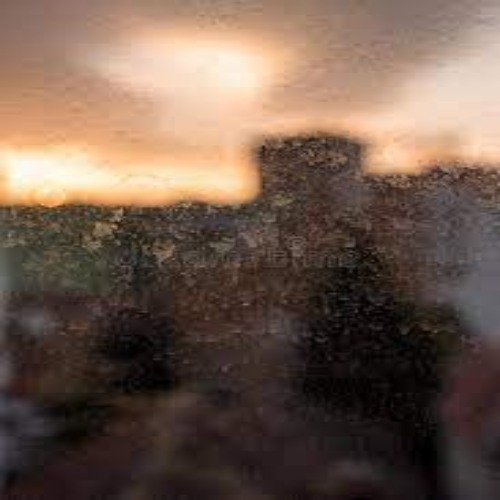

[[[357 497]]

 [[356 498]]

 [[352 498]]

 [[352 499]]

 [[369 499]]

 [[368 498]]

 [[365 498]]

 [[364 497]]]
0.0


False

In [ ]:
isSmearDetected("/content")

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from tqdm import trange


cap = cv2.VideoCapture('/content/out_13.avi')
f = open('results.txt', 'w')

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for i in trange(frame_count, unit=' frames', leave=False, dynamic_ncols=True, desc='Calculating blur ratio'):
	ret, frame = cap.read()
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	fm = cv2.Laplacian(gray, cv2.CV_64F).var()

	# Sample quality bar. Parameters adjusted manually to fit horizontal image size
	cv2.rectangle(frame, (0, 1080), (int(fm*1.6), 1040), (0,0,255), thickness=cv2.FILLED)

	im = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
	cv2_imshow(im)

	f.write(str(fm)+'\r')

	k = cv2.waitKey(1) & 0xff
	if k == 27:
		break

In [ ]:
!pip3 install git+https://github.com/umang-singhal/pydom.git

In [ ]:
from dom import DOM
import numpy as np

# initialize
iqa = DOM()

# using image path
score = iqa.get_sharpness('/content/images.jpeg')
print("Sharpness:", score)


Sharpness: 0.5945227943625379


## Detecting Camera Tampering using OpenCV and Python.

In [ ]:
#importing necessary libaries

from google.colab.patches import cv2_imshow
import numpy as np
import cv2

#Video capturing starts

cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()
ret, frame = cap.read()
fgmask = fgbg.apply(frame)
kernel = np.ones((5,5), np.uint8)
while(True):
    ret, frame = cap.read()
    if(frame is None):
        print("End of frame")
        break;
    else:
        a = 0
        bounding_rect = []
        fgmask = fgbg.apply(frame)
        fgmask= cv2.erode(fgmask, kernel, iterations=5)
        fgmask = cv2.dilate(fgmask, kernel, iterations = 5)
        cv2_imshow(frame)
        _,contours,_ = cv2.findContours(fgmask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for i in range(0,len(contours)):
            bounding_rect.append(cv2.boundingRect(contours[i]))
        for i in range(0,len(contours)):
            if bounding_rect[i][2] >=40 or bounding_rect[i][3] >= 40:
                a = a+(bounding_rect[i][2])*bounding_rect[i][3]
            if(a >=int(frame.shape[0])*int(frame.shape[1])/3):
                cv2.putText(frame,"TAMPERING DETECTED",(5,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2)
            cv2_imshow(frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

End of frame


In [ ]:

import cv2
import numpy as np
import os




#Change path according to where your data is
path = 'sample_drive'

def start_detection(dir_path):
    '''
    Identifies subdirectories from input folder and performs smear detection
    on the images in each subdirectory. Creates mean, intermediate and final images
	for each directory
	Input: path for data set
	'''
    print ('Starting...')
    directories = os.listdir(dir_path)
    dir_list = []
    for d in directories:
        if os.path.isdir(dir_path + '/' + d):
            dir_list.append(d)

    for directory in dir_list:
        temp_path = path + '/' + directory
        data_set = process_image(directory)
        print(data_set)
        final_data_set = split_data(data_set)

        print ('Creating Mean Image for', directory)
        mean_img = create_mean_image(final_data_set)
        cv2.imwrite(directory + '_mean_image.jpg',mean_img)

        print ('Creating Intermediate Mask for', directory)
        prelim_mask = create_prelim_mask(mean_img)
        cv2.imwrite(directory + '_intermediate_mask.jpg',prelim_mask)

        print ('Creating Mask for', directory)
        final_image = create_binary_mask(prelim_mask)
        cv2.imwrite(directory + '_final_mask.jpg',final_image)


def process_image(dir_path):
    '''
	Pre-processes every image by converting to grayscale, applying histogram equalization,
	blurring and binary threshold. Returns list of processed images
	Input: directory path for images
	'''
    images = []
    for image in os.listdir(dir_path):
        img = cv2.imread(os.path.join(dir_path,image))
        if img is not None:
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            eq_img = cv2.equalizeHist(gray_image)
            blur_img = cv2.blur(eq_img, (3,3))
            ret,thresh_img = cv2.threshold(blur_img,127,255,cv2.THRESH_BINARY)
            images.append(thresh_img)
    return images


def split_data(image_set):
    '''
	Splits set of images into subsets of approximately 200 images for batch processing
	Input: list of images
	'''
    total = []
    count = 0
    number_of_splits = len(image_set)/200
    print (number_of_splits)
    for i in range(number_of_splits):
        maxcount = count + 200
        if maxcount < len(image_set)-1:
            temp_arr = image_set[count:maxcount]
        else:
            temp_arr = image_set[count:]
        total.append(temp_arr)
        count += 200
    return total


def calc_mean_image(arr, length):
    '''
	Returns an averaged image of the given list of images
	Input: list of images
	'''
    i = 1
    sum_image = arr[0] * 1/length
    while (i < len(arr)):
        sum_image = cv2.add(sum_image,arr[i]* 1/length)
        i += 1
    return sum_image


def create_mean_image(total_data):
    '''
	Batch processes the average of each image subset and returns one averaged image
	Input: List of lists of images
	'''
    avg_images = []
    for data in total_data:
        temp_img = calc_mean_image(data,len(data))
        avg_images.append(temp_img)

    return calc_mean_image(avg_images,len(avg_images))


def create_prelim_mask(img):
    '''
	Applies an adaptive threshold on the input and performs a bitwise not operation
	Input: image
	'''
    adapt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,105,10)
    return cv2.bitwise_not(adapt)


def create_binary_mask(img):
    '''
	Applies erosion and dilation to reduce noise and returns a final binary mask
	Input: image
	'''
    kernel = np.ones((10,10),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 5)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    return dilation



In [ ]:
start_detection('/content')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotReadableError: Could not start video source
